# **Vega Scene**: Green Roof

In [229]:
from scipy import stats as st
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np 

### Getting the datasets

In [230]:
# Function to replace commas with periods, remove tabs, and convert scientific notation properly
def clean_temp(value):
    if isinstance(value, str):
        return float(value.replace(',', '.').replace('\t', ''))
    return value

# Read the CSV file, skip the first row, and use the second row as the header
airtemp_data = pd.read_csv('airtemp_data_all.csv', sep=';', skiprows=1, header=0)

# Clean the "Vannføring (m³/s)" column
airtemp_data['Lufttemperatur (°C)'] = airtemp_data['Lufttemperatur (°C)'].apply(clean_temp)

airtemp_data = airtemp_data[airtemp_data['Lufttemperatur (°C)'] != -10000000000]

airtemp_data.head()

,Tidspunkt,Lufttemperatur (°C),Korrigert,Kontrollert
0,2020-01-17 12:20:00Z,11.01,0,1
1,2020-01-17 12:30:00Z,10.96,0,1
2,2020-01-17 12:40:00Z,10.88,0,1
3,2020-01-17 12:50:00Z,10.79,0,1
4,2020-01-17 13:00:00Z,10.69,0,1


In [256]:
# Function to replace commas with periods, remove tabs, and convert scientific notation properly
def clean_precip(value):
    if isinstance(value, str):
        return float(value.replace(',', '.').replace('\t', ''))
    return value

# Read the CSV file, skip the first row, and use the second row as the header
precipitation_data = pd.read_csv('precipitation_data_all.csv', sep=';', skiprows=1, header=0)

# Clean the "Vannføring (m³/s)" column
precipitation_data['Nedbør (mm)'] = precipitation_data['Nedbør (mm)'].apply(clean_precip)

precipitation_data = precipitation_data[precipitation_data['Nedbør (mm)'] != -10000000000]

precipitation_data.head()

,Tidspunkt,Nedbør (mm),Korrigert,Kontrollert
0,2021-09-23 23:20:00Z,0.0,0,1
1,2021-09-23 23:30:00Z,0.0,0,1
2,2021-09-23 23:40:00Z,0.0,0,1
3,2021-09-23 23:50:00Z,0.0,0,1
4,2021-09-24 00:00:00Z,0.0,0,1


In [232]:
# Function to replace commas with periods, remove tabs, and convert scientific notation properly
def clean_dis(value):
    if isinstance(value, str):
        return float(value.replace(',', '.').replace('\t', ''))
    return value

# Read the CSV file, skip the first row, and use the second row as the header
discharge_data = pd.read_csv('discharge_data_all.csv', sep=';', skiprows=1, header=0)

# Clean the "Vannføring (m³/s)" column
discharge_data['Vannføring (m³/s)'] = discharge_data['Vannføring (m³/s)'].apply(clean_dis)

discharge_data.head()

,Tidspunkt,Vannføring (m³/s),Korrigert,Kontrollert
0,2020-01-17 12:10:00Z,0.000081,0,1
1,2020-01-17 12:30:00Z,0.000092,0,1
2,2020-01-17 12:40:00Z,0.000101,0,1
3,2020-01-17 12:50:00Z,0.000111,0,1
4,2020-01-17 13:00:00Z,0.000118,0,1


---

### Getting the right values for plotting

In [233]:
# Now access the "Vannføring (m³/s)" column and "tidspunkt" column (to datetime)
discharge_values = discharge_data['Vannføring (m³/s)']
time_dis = pd.to_datetime(discharge_data['Tidspunkt'])
#discharge_values

In [234]:
# Now access the "Nedbør (mm)" column and "tidspunkt" column (to datetime)
precipitation_values = precipitation_data['Nedbør (mm)']
time_prec = pd.to_datetime(precipitation_data['Tidspunkt'])
#precipitation_values

In [235]:
airtemp_values = airtemp_data['Lufttemperatur (°C)']
time_air = pd.to_datetime(airtemp_data['Tidspunkt'])
#airtemp_values

In [236]:
# chategorizing rain and snow
TT = 0.5  # Example threshold value
precipitation_values['Snowfall'] = np.where(airtemp_values[0:1004453] <= TT, precipitation_values[0:1004453], 0)
precipitation_values['Rainfall'] = np.where(airtemp_values[0:1004453] > TT, precipitation_values[0:1004453], 0)

---

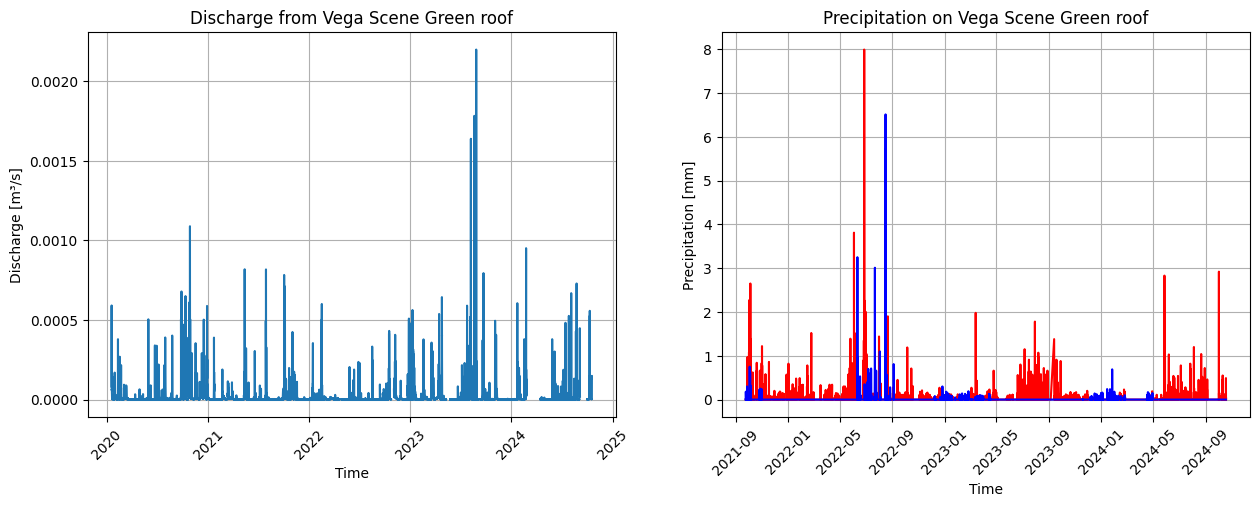

In [237]:
# Total discharge and precipitation from both of the datasets
fig , ax = plt.subplots(1,2,figsize=(15,5))

ax[0].plot(time_dis, discharge_values)
ax[0].set_xlabel('Time')
ax[0].set_ylabel('Discharge [m³/s]')
ax[0].set_title('Discharge from Vega Scene Green roof')
ax[0].grid(True)
ax[0].tick_params(axis='x', rotation=45)

ax[1].plot(time_prec, precipitation_values['Rainfall'], color='r', label='Rainfall')
ax[1].plot(time_prec, precipitation_values['Snowfall'], color='b', label='Snowfall')
ax[1].set_xlabel('Time')
ax[1].set_ylabel('Precipitation [mm]')
ax[1].set_title('Precipitation on Vega Scene Green roof')
ax[1].grid(True)
ax[1].tick_params(axis='x', rotation=45)

In [238]:
#plt.scatter(discharge_values[87997:], precipitation_values[0:145545])
#plt.xlabel('Discharge [m³/s]')
#plt.ylabel('Precipitation [mm]')

#print(len(discharge_values[87997:]))
#print(len(precipitation_values[0:145545])) # precipitation data starts to measure with smaller timesteps suddenly ??

#print(discharge_values[87997:].corr(precipitation_values[0:145545]))

## Scatterplot and regression line for discharge and precipitation (daily)

In [274]:
def clean_precip(value):
    if isinstance(value, str):
        return float(value.replace(',', '.').replace('\t', ''))
    return value

# Read the CSV file, skip the first row, and use the second row as the header
precipitation_data = pd.read_csv('precipitation_data_all.csv', sep=';', skiprows=1, header=0)

# Clean the "Vannføring (m³/s)" column
precipitation_data['Nedbør (mm)'] = precipitation_data['Nedbør (mm)'].apply(clean_precip)

precipitation_data = precipitation_data[precipitation_data['Nedbør (mm)'] != -10000000000]

#______________________________________________________________________________________________________________________

# First, make sure the 'Tidspunkt' column is in datetime format
precipitation_data['Tidspunkt'] = pd.to_datetime(precipitation_data['Tidspunkt'])

# Set 'Tidspunkt' column as index
precipitation_data.set_index('Tidspunkt', inplace=True)

# Resample to daily values and sum the precipitation for each day
daily_prec_data = precipitation_data.resample('D').sum()

# Finally, slice the dataframe based on the start and end dates
start_date = '2021-09-30'
end_date = '2024-10-31'
sliced_precip_day = daily_prec_data.loc[start_date:end_date]

# Reset the index
sliced_precip_day.reset_index(inplace=True)

# Print the sliced dataframe
#sliced_precip_day

In [306]:
# Function to replace commas with periods, remove tabs, and convert scientific notation properly
def clean_dis(value):
    if isinstance(value, str):
        return float(value.replace(',', '.').replace('\t', ''))
    return value

# Read the CSV file, skip the first row, and use the second row as the header
discharge_data = pd.read_csv('discharge_data_all.csv', sep=';', skiprows=1, header=0)

# Clean the "Vannføring (m³/s)" column
discharge_data['Vannføring (m³/s)'] = discharge_data['Vannføring (m³/s)'].apply(clean_dis)

# ________________________________________________________

discharge_data['Tidspunkt'] = pd.to_datetime(discharge_data['Tidspunkt'])

# Set 'Tidspunkt' column as index
discharge_data.set_index('Tidspunkt', inplace=True)

# Resample to daily values and sum the precipitation for each day
daily_dis_data = discharge_data.resample('D').sum()

# Finally, slice the dataframe based on the start and end dates
start_date = '2021-09-30'
end_date = '2024-10-31'
sliced_dis_day = daily_dis_data.loc[start_date:end_date]

# Reset the index
sliced_dis_day.reset_index(inplace=True)

# Print the sliced dataframe
#sliced_dis_day


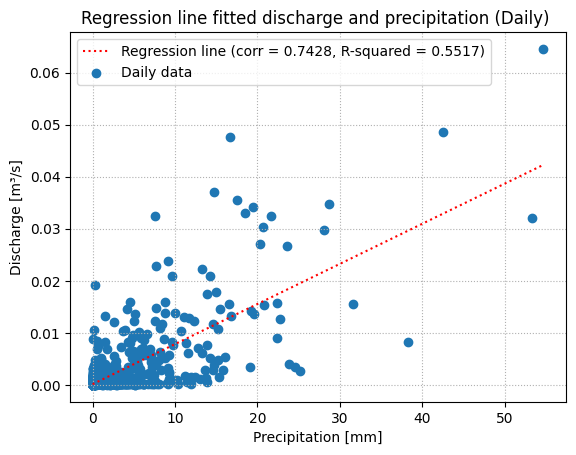

In [307]:
import statsmodels.formula.api as smf 

dis_day = sliced_dis_day['Vannføring (m³/s)']
precip_day = sliced_precip_day['Nedbør (mm)']

combined_data_day = pd.concat([dis_day, precip_day], axis=1)
combined_data_day.columns = ['Discharge', 'Precipitation']

linfit_day = smf.ols(formula='Discharge ~ Precipitation', data=combined_data_day).fit()
intercept_day, slope_day = linfit_day.params

corr_dis_prec = combined_data_day['Discharge'].corr(combined_data_day['Precipitation'])

plt.plot([precip_day.min(), precip_day.max()], [intercept_day + slope_day*precip_day.min(), intercept_day + slope_day*precip_day.max()], 'r:', label=f'Regression line (corr = {corr_dis_prec:.4f}, R-squared = {linfit_day.rsquared:.4f})')
plt.scatter(combined_data_day['Precipitation'], combined_data_day['Discharge'], label = "Daily data")
plt.ylabel('Discharge [m³/s]')
plt.xlabel('Precipitation [mm]')
plt.title('Regression line fitted discharge and precipitation (Daily) ')
plt.grid(linestyle=':')
plt.legend()
plt.show()

## Using daily values to see how well the roof keeps the water

In [325]:
# July 2023
start_ret = '2023-07-01'
end_ret = '2023-07-31'

In [433]:
# Creating discharge from precipitation data
dis_from_prec_data = daily_prec_data.loc[start_ret:end_ret]

# The area of the roof is 0.001 km^2
area = 0.001 * 1000000 
day_to_sec = 24*60*60 # sec

dis_prec_m3 = (dis_from_prec_data["Nedbør (mm)"]*area)
dis_prec = dis_prec_m3/(day_to_sec)

dis_prec.head()

Tidspunkt
2023-07-01 00:00:00+00:00    0.000000
2023-07-02 00:00:00+00:00    0.139120
2023-07-03 00:00:00+00:00    0.009954
2023-07-04 00:00:00+00:00    0.001389
2023-07-05 00:00:00+00:00    0.004630
Freq: D, Name: Nedbør (mm), dtype: float64

In [434]:
# Discharge from discharge data
dis_ret_data = daily_dis_data.loc[start_ret:end_ret]

dis_july = dis_ret_data["Vannføring (m³/s)"]

dis_july.head()

Tidspunkt
2023-07-01 00:00:00+00:00    0.000157
2023-07-02 00:00:00+00:00    0.001258
2023-07-03 00:00:00+00:00    0.000250
2023-07-04 00:00:00+00:00    0.000159
2023-07-05 00:00:00+00:00    0.000145
Freq: D, Name: Vannføring (m³/s), dtype: float64

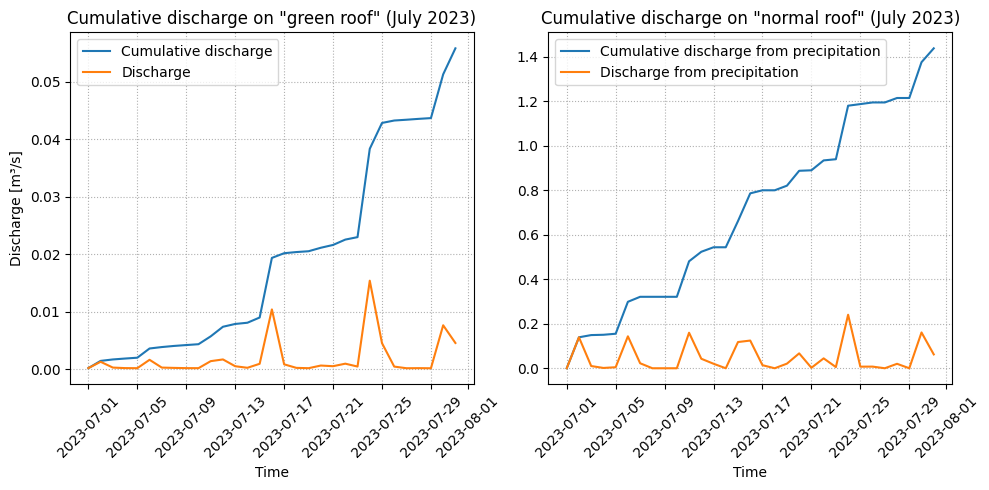

In [435]:


fig,ax = plt.subplots(1,2,figsize=(10,5), sharex=True, sharey=False)

ax[0].plot(np.cumsum(dis_july), label='Cumulative discharge')
ax[0].plot(dis_july, label='Discharge')

ax[0].set_xlabel('Time')
ax[0].set_ylabel('Discharge [m³/s]')
ax[0].set_title('Cumulative discharge on "green roof" (July 2023)')
ax[0].tick_params(axis='x', rotation=45)
ax[0].grid(linestyle=":")
ax[0].legend()

ax[1].plot(np.cumsum(dis_prec), label='Cumulative discharge from precipitation')
ax[1].plot(dis_prec, label='Discharge from precipitation')

ax[1].tick_params(axis='x', rotation=45)
ax[1].grid(linestyle=":")
ax[1].set_title('Cumulative discharge on "normal roof" (July 2023)')
ax[1].set_xlabel('Time')
ax[1].legend()

plt.tight_layout()
plt.show()

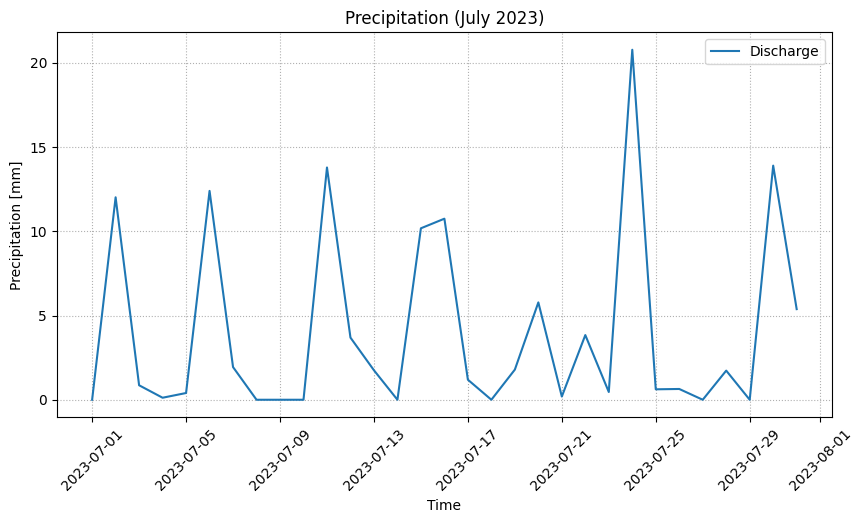

In [429]:
fig,ax = plt.subplots(1,1,figsize=(10,5), sharex=True, sharey=False)

ax.plot(dis_from_prec_data["Nedbør (mm)"], label='Discharge')

ax.set_xlabel('Time')
ax.set_ylabel('Precipitation [mm]')
ax.set_title('Precipitation (July 2023)')
ax.tick_params(axis='x', rotation=45)
ax.grid(linestyle=":")
ax.legend()

---

## Monthly discharge

In [270]:
# Function to replace commas with periods, remove tabs, and convert scientific notation properly
def clean_dis(value):
    if isinstance(value, str):
        return float(value.replace(',', '.').replace('\t', ''))
    return value

# Read the CSV file, skip the first row, and use the second row as the header
discharge_data = pd.read_csv('discharge_data_all.csv', sep=';', skiprows=1, header=0)

# Clean the "Vannføring (m³/s)" column
discharge_data['Vannføring (m³/s)'] = discharge_data['Vannføring (m³/s)'].apply(clean_dis)

# First, make sure the 'Tidspunkt' column is in datetime format
discharge_data['Tidspunkt'] = pd.to_datetime(discharge_data['Tidspunkt'])

# Set 'Tidspunkt' column as index
discharge_data.set_index('Tidspunkt', inplace=True)

# Resample to monthly values
monthly_dis_data = discharge_data.resample('D').sum()
#monthly_dis_data.head()


In [ ]:
monthly_dis = monthly_dis_data['Vannføring (m³/s)']
#plt.plot(monthly_dis)

## Monthly precipitation

In [ ]:
# Function to replace commas with periods, remove tabs, and convert scientific notation properly
def clean_precip(value):
    if isinstance(value, str):
        return float(value.replace(',', '.').replace('\t', ''))
    return value

# Read the CSV file, skip the first row, and use the second row as the header
precipitation_data = pd.read_csv('precipitation_data_all.csv', sep=';', skiprows=1, header=0)

# Clean the "Vannføring (m³/s)" column
precipitation_data['Nedbør (mm)'] = precipitation_data['Nedbør (mm)'].apply(clean_precip)

precipitation_data = precipitation_data[precipitation_data['Nedbør (mm)'] != -10000000000]

# First, make sure the 'Tidspunkt' column is in datetime format
precipitation_data['Tidspunkt'] = pd.to_datetime(precipitation_data['Tidspunkt'])

# Set 'Tidspunkt' column as index
precipitation_data.set_index('Tidspunkt', inplace=True)

# Resample to monthly values
monthly_prec_data = precipitation_data.resample('ME').sum()
#monthly_prec_data.tail()

In [ ]:
monthly_prec = monthly_prec_data['Nedbør (mm)']
#plt.plot(monthly_prec)

## Scatterplot and regression line for discharge and precipitation (monthly)

In [285]:
# Slicing the discharge dataset because it is longer than the precipitation dataset
start_date = '2021-09-30'
end_date = '2024-10-31'
sliced_dis = monthly_dis.loc[start_date:end_date]
#sliced_dis

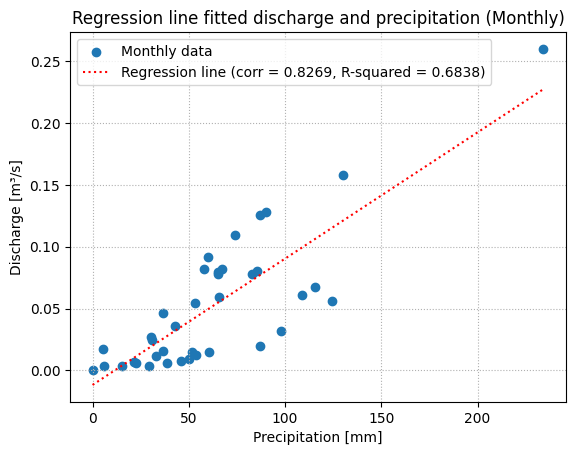

In [305]:
import statsmodels.formula.api as smf 
combined_data = pd.concat([sliced_dis, monthly_prec], axis=1)
combined_data.columns = ['Discharge', 'Precipitation']

linfit_dis_prec = smf.ols(formula='Discharge ~ Precipitation', data=combined_data).fit()
intercept, slope = linfit_dis_prec.params

corr_dis_prec = sliced_dis.corr(monthly_prec)

plt.scatter(monthly_prec,sliced_dis, label='Monthly data')
plt.plot([monthly_prec.min(), monthly_prec.max()], [intercept + slope*monthly_prec.min(), intercept + slope*monthly_prec.max()], 'r:', label=f'Regression line (corr = {corr_dis_prec:.4f}, R-squared = {linfit_dis_prec.rsquared:.4f})')

plt.ylabel('Discharge [m³/s]')
plt.xlabel('Precipitation [mm]')
plt.title('Regression line fitted discharge and precipitation (Monthly)')
plt.grid(linestyle=':')
plt.legend()
plt.show()

#print(linfit_dis_prec.summary())

- Looking at the monthly values for discharge and precipitation, and fitting a regression line to it, we can look at the correlation and r-squared to get some information of how the discharge is connected to precipitation.
- From this plot, we see that for very low precipitation values, there is a close correlation between low discharge. It spreads more out when deamling with higher amounts of precipitation, so when there is a monthly value of around 100 mm of precipitation, the discharge has both values 0.025, 0.075 and 0.125. This could be related to how much water there already is inside the soil in the green roof. There might be dry soil, saturated soil, and different levels of this would control how much water can be retained, thus making a more spread out chance for a spesific discharge.
- For the very low values, this is not so important. If the soil is saturated or dry, it does not matter that much when the rainfall is very small, because it would manage the water masses and retain it better (??)